In [4]:
# 確率勾配降下法
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

0196277  0.         0.00983902]

*** 偏微分_バイアス1 ***
[ 0.          0.00420227  0.01724019  0.          0.          0.
  0.          0.02632953  0.         -0.00875892]

*** 偏微分_バイアス2 ***
0.017517145129398504

*** 総入力1 ***
[-1.07042332  0.66901468  0.24630453 -1.23604272 -0.32097194 -0.68825904
 -1.88620689  0.62393012 -0.32773246 -0.12456296]

*** 中間層出力1 ***
[0.         0.66901468 0.24630453 0.         0.         0.
 0.         0.62393012 0.         0.        ]

*** 総入力2 ***
1.5728240903131918

*** 出力1 ***
1.5728240903131918

出力合計: 1.5728240903131918
*** 偏微分_重み1 ***
[[ 0.         -0.00481729 -0.01982471  0.          0.          0.
   0.         -0.0303087   0.          0.        ]
 [ 0.         -0.01188849 -0.04892494  0.          0.          0.
   0.         -0.07479816  0.          0.        ]]

*** 偏微分_重み2 ***
[ 0.         -0.06421019 -0.02363963  0.          0.          0.
  0.         -0.0598831   0.          0.        ]

*** 偏微分_バイアス1 ***
[ 0.         -0.02290797 -0.09427366  0.   

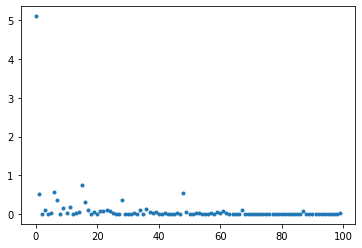

In [10]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)  
    u2 = np.dot(z1, W2) + b2
    y = u2

    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 100

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

1983683 -0.2457037   0.66005365]]

*** 偏微分_重み2 ***
[-9.06801254e-01 -4.74413329e-10 -6.28523056e-20 -9.06801254e-01
 -9.06801254e-01 -9.06801254e-01 -3.23102704e-40 -9.06801254e-01
 -9.06801254e-01 -8.09305401e-37]

*** 偏微分_バイアス1 ***
[ 0.51983456 -0.34502713 -0.4607533   0.33641123  0.53223394  0.33765424
 -0.71322335  0.24606227  0.27501493 -0.73879476]

*** 偏微分_バイアス2 ***
-0.9068012535730041

*** 総入力1 ***
[-0.64697959 -0.31461636  0.19799495  0.51641271 -3.03237059  0.65502029
 -4.02986605  0.22485453  0.21793196 -0.44492001]

*** 中間層出力1 ***
[0.3436705  0.42198834 0.54933766 0.62630856 0.04598472 0.65814088
 0.01746622 0.55597798 0.55426837 0.39056926]

*** 総入力2 ***
-1.7895848622295518

*** 出力1 ***
-1.7895848622295518

出力合計: -1.7895848622295518
*** 偏微分_重み1 ***
[[-0.69124358  0.36342672  0.4708297  -0.41322294 -0.72882795 -0.41072313
   0.78514237 -0.30447043 -0.34218105  0.78310809]
 [ 0.78101913 -0.41062692 -0.53197891  0.46689044  0.82348479  0.46406597
  -0.88711307  0.34401366  0.

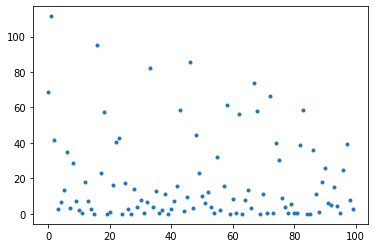

In [11]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    # z1 = functions.relu(u1)
    
    ## 試してみよう
    z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    
    ## 試してみよう_入力値の設定
    data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 100

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

試してみようの内容  
活性化関数をReLU -> Sigmoid  
入力データを-5〜5のランダム数値に